In [1]:
#pip install keras

In [2]:
#pip install tensorflow

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import warnings
#warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("Churn_Modelling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
df["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [6]:
df["Gender"].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

# Separation of X and Y

In [7]:
x = df.iloc[:,3:13] # No use of Custid , surname, rownumber, that's why selecting from 3 not 0 index.
y = df.iloc[:,13]

In [8]:
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [9]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

# Encoding : One Hot Encoding

In [10]:
geography = pd.get_dummies(x["Geography"])
gender = pd.get_dummies(x["Gender"])

In [11]:
geography

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
9995,1,0,0
9996,1,0,0
9997,1,0,0
9998,0,1,0


In [12]:
gender

,Female,Male
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
9995,0,1
9996,0,1
9997,1,0
9998,0,1


In [13]:
x = x.drop(["Geography","Gender"], axis = 1) # We did Encoding that's why droping original column.

# Feature Scaling: StandardScaler

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
for i in x:
    x[i] = sc.fit_transform(x[[i]])
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276
...,...,...,...,...,...,...,...,...
9995,1.246488,0.007457,-0.004426,-1.225848,0.807737,0.646092,-1.030670,-0.066419
9996,-1.391939,-0.373958,1.724464,-0.306379,-0.911583,0.646092,0.970243,0.027988
9997,0.604988,-0.278604,0.687130,-1.225848,-0.911583,-1.547768,0.970243,-1.008643
9998,1.256835,0.293517,-0.695982,-0.022608,0.807737,0.646092,-1.030670,-0.125231


In [15]:
x = pd.concat([x,geography, gender], axis = 1)

In [16]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,France,Germany,Spain,Female,Male
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,1,0,0,1,0
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,0,0,1,1,0
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,1,0,0,1,0
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,1,0,0,1,0
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.246488,0.007457,-0.004426,-1.225848,0.807737,0.646092,-1.030670,-0.066419,1,0,0,0,1
9996,-1.391939,-0.373958,1.724464,-0.306379,-0.911583,0.646092,0.970243,0.027988,1,0,0,0,1
9997,0.604988,-0.278604,0.687130,-1.225848,-0.911583,-1.547768,0.970243,-1.008643,1,0,0,1,0
9998,1.256835,0.293517,-0.695982,-0.022608,0.807737,0.646092,-1.030670,-0.125231,0,1,0,0,1


# Train Test Split

In [17]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.2, random_state = 0)

# ANN: Artificial Neural Network

In [18]:
# Importing Necessary libraries
import keras # Keras(wrapper/run on top of TensorFlow, Microsoft Cognitive Toolkit (CNTK), and Theano) is Deep learnig framework written in python provides interface for building a neural network.
from keras.models import Sequential # Sequential allows you to create a neural network model by adding layers one by one in a sequential manner.
from keras.layers import Dense # The Dense(perform Linear Operation on input data) layer is a fully connected layer in Keras, where each neuron is connected to every neuron in the preceding layer
from keras.layers import LeakyReLU, PReLU, ELU # Actiavtion function used for in hidden layers for giving non linearity to input data so that model can understand a complex data.
from keras.layers import Dropout # Regularization technique used to reuce overfitting in neural network.

In [19]:
# Intialising the ANN
classifier = Sequential()

# Adding the input layer and first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = "he_uniform", activation = "relu", input_dim = 13))

# Adding a second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = "he_uniform", activation = "relu"))

# Adding a output layer
classifier.add(Dense(units = 1, kernel_initializer = "glorot_uniform", activation = "sigmoid"))

# Compiling the ANN
classifier.compile(optimizer = "Adamax", loss = "binary_crossentropy", metrics = ["accuracy"])

# Fitting the ANN into training set
model_history = classifier.fit(xtrain, ytrain, validation_split = 0.33, batch_size = 10, epochs = 100)

C:\Users\dv850\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6541 - loss: 0.6682 - val_accuracy: 0.7955 - val_loss: 0.5555
Epoch 2/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7892 - loss: 0.5392 - val_accuracy: 0.7955 - val_loss: 0.5041
Epoch 3/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7952 - loss: 0.4925 - val_accuracy: 0.7955 - val_loss: 0.4882
Epoch 4/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7979 - loss: 0.4759 - val_accuracy: 0.7955 - val_loss: 0.4781
Epoch 5/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7861 - loss: 0.4783 - val_accuracy: 0.7955 - val_loss: 0.4696
Epoch 6/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7850 - loss: 0.4743 - val_accuracy: 0.7955 - val_loss: 0.4617
Epoch 7/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7896 - loss: 0.4595 - val_accuracy: 0.7955 - val_loss: 0.4546
Epoch 8/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8012 - loss: 0.4364 - val_accu

536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8567 - loss: 0.3410 - val_accuracy: 0.8451 - val_loss: 0.3673
Epoch 52/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8553 - loss: 0.3432 - val_accuracy: 0.8455 - val_loss: 0.3671
Epoch 53/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8551 - loss: 0.3450 - val_accuracy: 0.8470 - val_loss: 0.3669
Epoch 54/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8559 - loss: 0.3498 - val_accuracy: 0.8470 - val_loss: 0.3662
Epoch 55/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8557 - loss: 0.3352 - val_accuracy: 0.8485 - val_loss: 0.3655
Epoch 56/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8541 - loss: 0.3479 - val_accuracy: 0.8497 - val_loss: 0.3653
Epoch 57/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8589 - loss: 0.3382 - val_accuracy: 0.8485 - val_loss: 0.3645
Epoch 58/100
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8546 - loss: 0.3491 - val_accuracy:

In [20]:
# List all the data in history

print(model_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


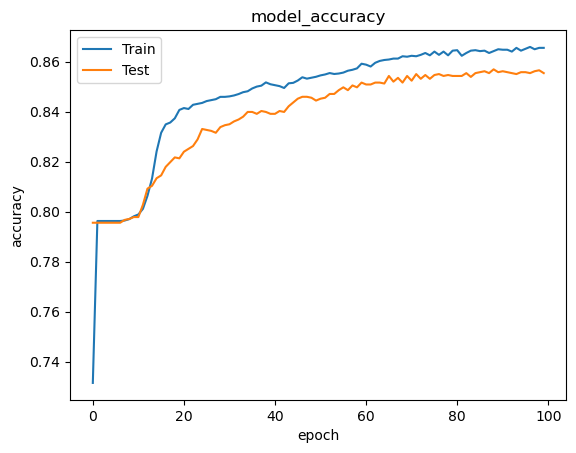

In [27]:
# Summarize history for accuracy
plt.plot(model_history.history["accuracy"])
plt.plot(model_history.history["val_accuracy"])
plt.title("model_accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(["Train","Test"], loc = "upper left")
plt.show()

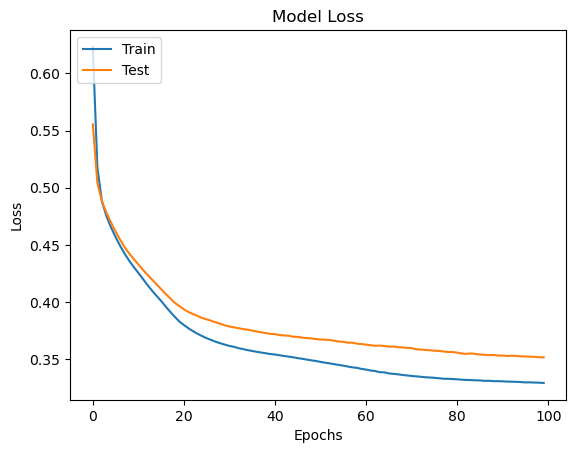

In [28]:
# Summarize the history for loss
plt.plot(model_history.history["loss"])
plt.plot(model_history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train","Test"], loc = "upper left")
plt.show()

In [21]:
# Part 3: Making the Predictions and evaluating the model

# Predicting the test set results
ypred = classifier.predict(xtest)
ypred = (ypred > 0.5) # Converting the probabilites in binary outcome by boolean method in which using 0.5(usual value) as a thershold.

# Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, ypred)

# Calulating the Accuracy
from sklearn.metrics import accuracy_score
ac = accuracy_score(ytest, ypred)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [22]:
print(f"The confusion Matrix is \n\n {cm}")

The confusion Matrix is 

 [[1518   77]
 [ 206  199]]


In [23]:
print(f"The Accuracy for Churning model is {ac*100} %")

The Accuracy for Churning model is 85.85000000000001 %
